## **Exploring the Most Popular YouTube Channels: An EDA Study**

**Dataset Link:** https://www.kaggle.com/datasets/surajjha101/top-youtube-channels-data

1. IMPORTING LIBRARIES:
Start by importing the necessary libraries for the project, such as pandas, matplotlib, seaborn, etc. These libraries will be used to perform data reading, cleaning, analysis and visualization.

2. READING DATA:
Read the data set of most subscribed YouTube channels into a pandas dataframe. Make sure to handle any missing values or errors in the data while reading.

3. DATA PREPROCESSING:
Perform necessary preprocessing on the data to make it ready for analysis. This may include removing duplicates, handling missing values, converting data types, and cleaning up the data.

4. EXPLORATORY ANALYSIS:
Perform exploratory analysis on the data to get an understanding of the data distribution, patterns, and relationships. Use descriptive statistics and plots to summarize the data and identify any outliers or trends.

5. DATA VISUALIZATION:
Visualize the data to make it more meaningful and presentable. Use various types of plots, such as bar plots, line plots, histograms, scatter plots, etc. to illustrate patterns and relationships in the data. Highlight important findings from the exploratory analysis and make sure the visualization is clear and easy to understand.

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [2]:
data = pd.read_csv("/content/most_subscribed_youtube_channels.csv")
data.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


In [3]:
data.shape

(1000, 7)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
started,1000.0,2012.376,3.998076,1970.0,2010.00,2013.0,2015.00,2021.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [6]:
data.isnull().sum()

rank            0
Youtuber        0
subscribers     0
video views     0
video count     0
category       27
started         0
dtype: int64

In [7]:
#pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

**Handling Category Data (Imputing Missing value)**

In [8]:
# filling missing values

data["category"].value_counts()

Entertainment            241
Music                    222
People & Blogs           119
Gaming                   102
Comedy                    63
Film & Animation          52
Education                 46
Howto & Style             45
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: category, dtype: int64

In [9]:
data["category"].unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', nan, 'Gaming',
       'Entertainment', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [10]:
data["category"] = data["category"].fillna(data["category"].mode()[0])

In [11]:
data.isnull().sum()

rank           0
Youtuber       0
subscribers    0
video views    0
video count    0
category       0
started        0
dtype: int64

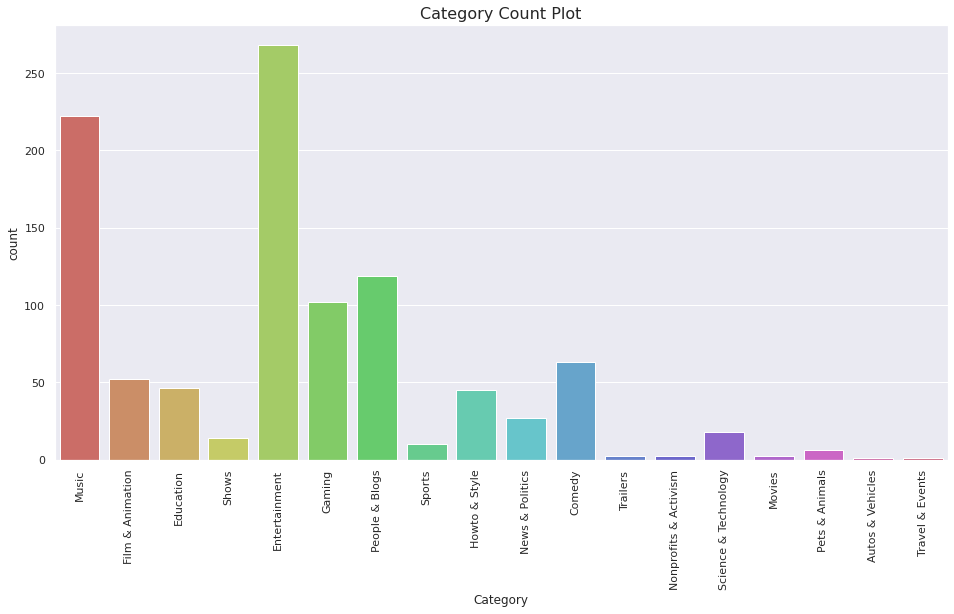

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(data["category"],palette = "hls")
plt.title("Category Count Plot",fontsize = 16)
plt.xlabel("Category",fontsize = 12)
plt.xticks(rotation=90)
plt.show()

In [39]:
categories=data['category'].value_counts()
fig=px.pie(values=categories.values,names=categories.index,color_discrete_sequence=px.colors.sequential.RdBu,
 title="Categories of Youtube Channels", template='presentation')

fig.update_traces(textposition='inside',textfont_size=11,textinfo='percent+label')
fig.show();

In [14]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

### **Handling 'subscribers', 'video views' and 'video count'**

##### **1. subscribers**

In [15]:
data["subscribers"]

0      222,000,000
1      154,000,000
2      140,000,000
3      139,000,000
4      116,000,000
          ...     
995     10,900,000
996     10,900,000
997     10,900,000
998     10,900,000
999     10,900,000
Name: subscribers, Length: 1000, dtype: object

In [16]:
## Removing comma and coverting datatype from Object to Integer

data["subscribers"] = data["subscribers"].str.replace(",","").astype(int)

##### **2. video views**

In [17]:
data["video views"]

0      198,459,090,822
1                    0
2      135,481,339,848
3      125,764,252,686
4                    0
            ...       
995      4,609,300,218
996      4,070,521,973
997      3,093,784,767
998      3,040,301,750
999      2,808,411,693
Name: video views, Length: 1000, dtype: object

In [18]:
## Removing comma and coverting datatype from Object to Integer

data["video views"] = data["video views"].str.replace(",","").astype(int)

In [19]:
data["video views"]

0      198459090822
1                 0
2      135481339848
3      125764252686
4                 0
           ...     
995      4609300218
996      4070521973
997      3093784767
998      3040301750
999      2808411693
Name: video views, Length: 1000, dtype: int64

##### **3. video count**

In [20]:
data["video count"]

0      17,317
1           0
2         786
3      91,271
4           0
        ...  
995     3,528
996       690
997     1,006
998       831
999       590
Name: video count, Length: 1000, dtype: object

In [21]:
## Removing comma and coverting datatype from Object to Integer

data["video count"] = data["video count"].str.replace(",","").astype(int)

In [22]:
data["video count"]

0      17317
1          0
2        786
3      91271
4          0
       ...  
995     3528
996      690
997     1006
998      831
999      590
Name: video count, Length: 1000, dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   int64 
 3   video views  1000 non-null   int64 
 4   video count  1000 non-null   int64 
 5   category     1000 non-null   object
 6   started      1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [23]:
data["started"].unique()

array([2006, 2015, 2013, 2010, 2012, 2016, 2007, 2014, 2018, 2008, 2005,
       2011, 2009, 2017, 1970, 2020, 2019, 2021])

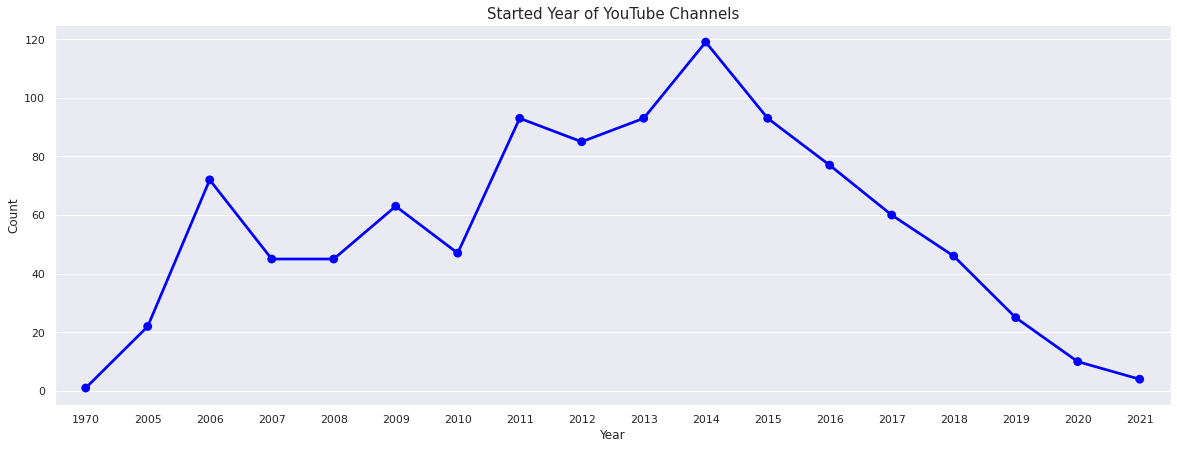

In [24]:
plt.figure(figsize=(20,7))
year = data["started"].value_counts()
sns.pointplot(x = year.index,y = year.values,color = "blue")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Started Year of YouTube Channels",fontsize = 15)
plt.show()

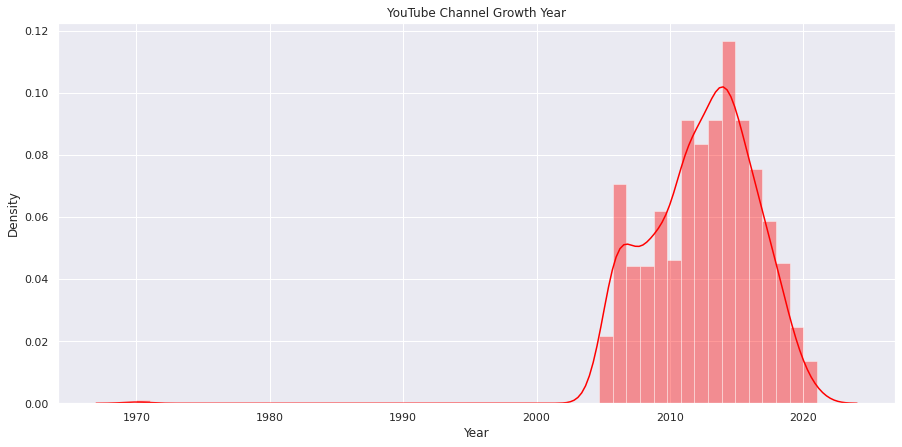

In [25]:
plt.figure(figsize=(15,7))
sns.distplot(data["started"],color = "red")
plt.xlabel("Year")
plt.title("YouTube Channel Growth Year")
plt.show()

In [26]:
year_mean = data.groupby("started").mean().reset_index()
year_mean

,started,rank,subscribers,video views,video count
0,1970,100.000000,3.330000e+07,2.725287e+09,540.000000
1,2005,423.590909,2.197273e+07,1.044777e+10,15480.409091
2,2006,426.625000,2.767361e+07,1.676924e+10,16612.625000
3,2007,466.866667,2.365111e+07,1.396931e+10,24476.800000
4,2008,452.533333,2.118222e+07,1.140225e+10,14807.333333
5,2009,468.460317,2.001111e+07,1.023113e+10,10564.380952
6,2010,532.127660,1.935957e+07,8.997569e+09,9957.319149
7,2011,485.204301,1.981720e+07,8.804918e+09,5772.118280
8,2012,487.752941,2.116588e+07,8.844339e+09,7142.811765
9,2013,463.483871,2.200108e+07,7.183893e+09,7368.139785


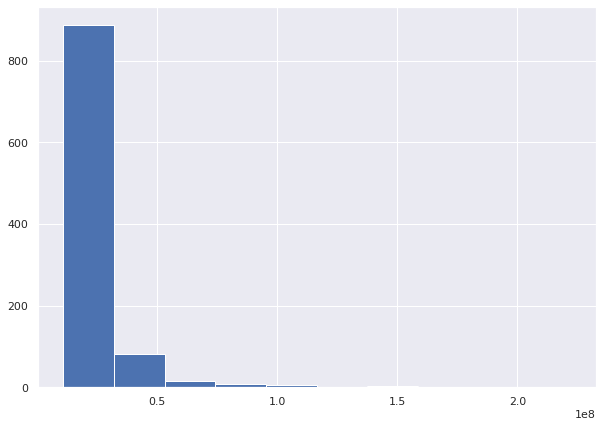

In [27]:
plt.figure(figsize=(10,7))
plt.hist(data['subscribers'])
plt.show()

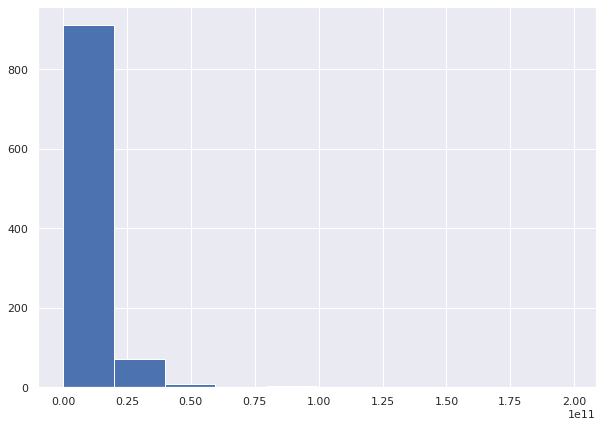

In [28]:
plt.figure(figsize=(10,7))
plt.hist(data['video views'])
plt.show()

In [29]:
def pltplot(data,x_col,y_col,color,ax,title):
  sns.pointplot(data=data,x = x_col,y = y_col,color = color,ax=ax).set_title(title,size=10)


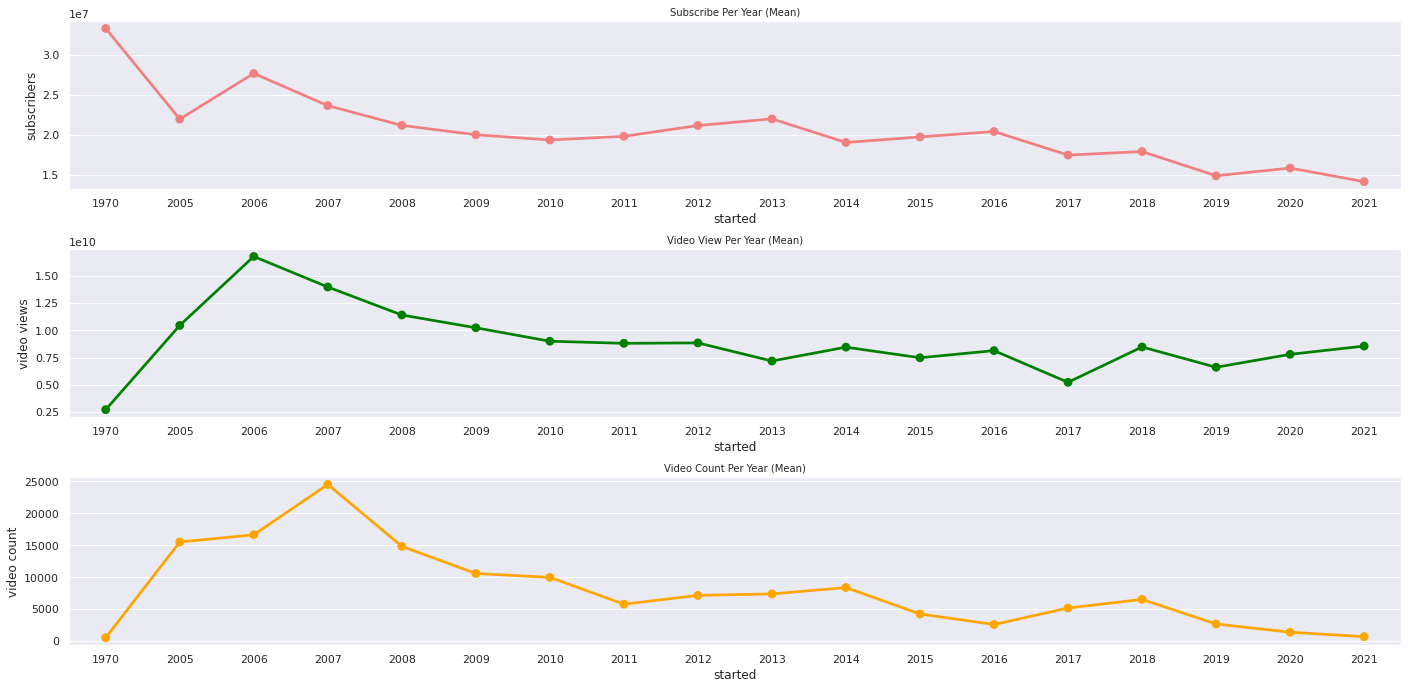

In [30]:

fig, ((ax1),(ax2),(ax3)) = plt.subplots(ncols = 1,nrows = 3)
fig.set_size_inches(20,10)
fig.tight_layout(pad = 3.0)

pltplot(year_mean,"started","subscribers","lightcoral",ax1,"Subscribe Per Year (Mean)")
pltplot(year_mean,"started","video views","green",ax2,"Video View Per Year (Mean)")
pltplot(year_mean,"started","video count","orange",ax3,"Video Count Per Year (Mean)")

**Top 5 Categories that have subscribers**

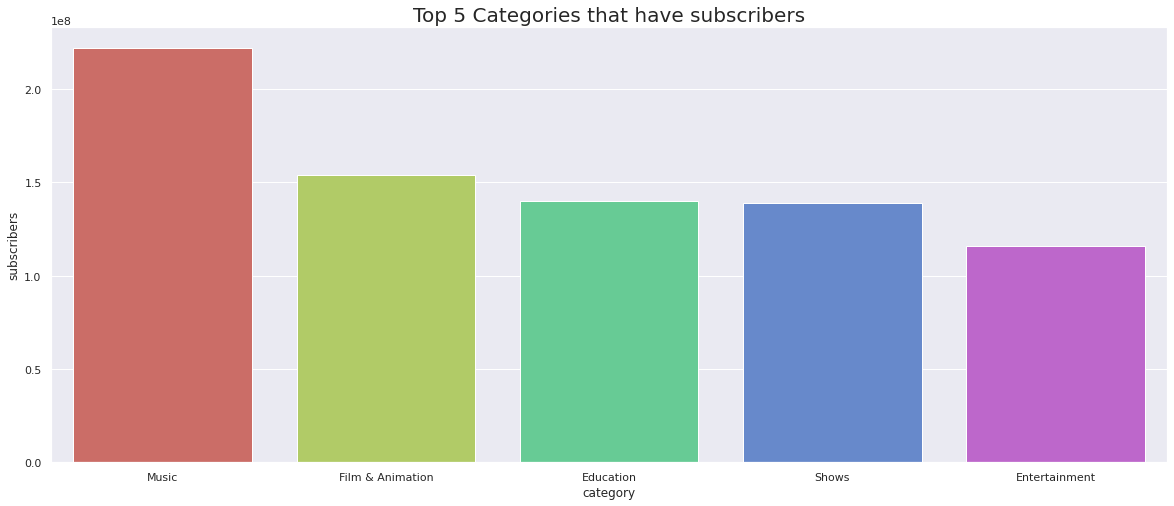

In [31]:
subscribers=data.sort_values('subscribers',ascending=False)
plt.figure(figsize=(20,8))
subscribers=subscribers[:5] 
sns.barplot(x="category",y="subscribers",data=subscribers,palette="hls")
plt.title('Top 5 Categories that have subscribers',size=20);

**Top 5 Categories that have Video Views**

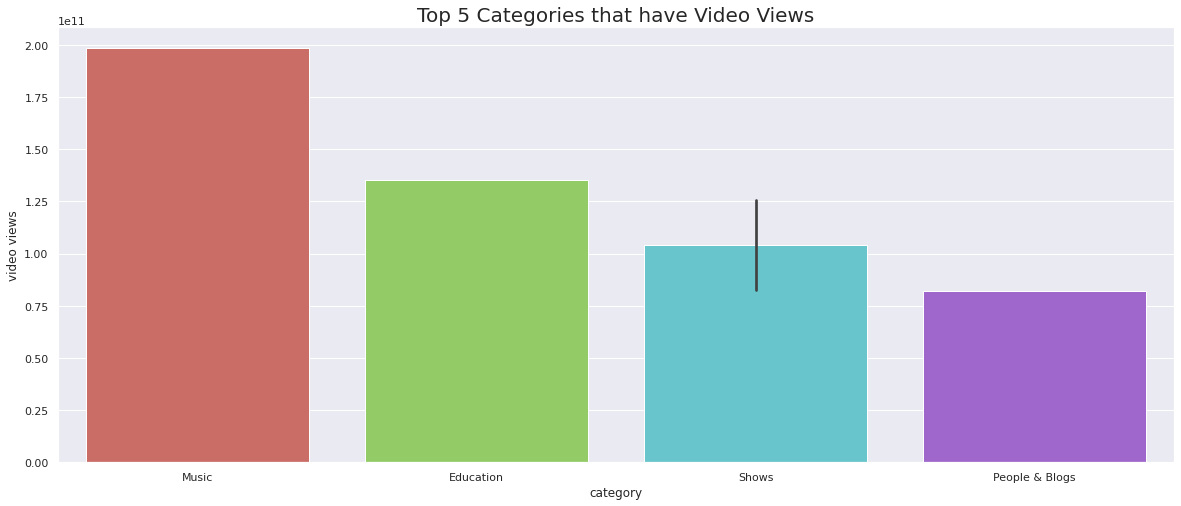

In [32]:
videoviews=data.sort_values('video views',ascending=False)
plt.figure(figsize=(20,8))
videoviews=videoviews[:5]
sns.barplot(x="category",y="video views",data=videoviews,palette="hls")
plt.title('Top 5 Categories that have Video Views',size=20);

**Top Categories that have Video Counts**

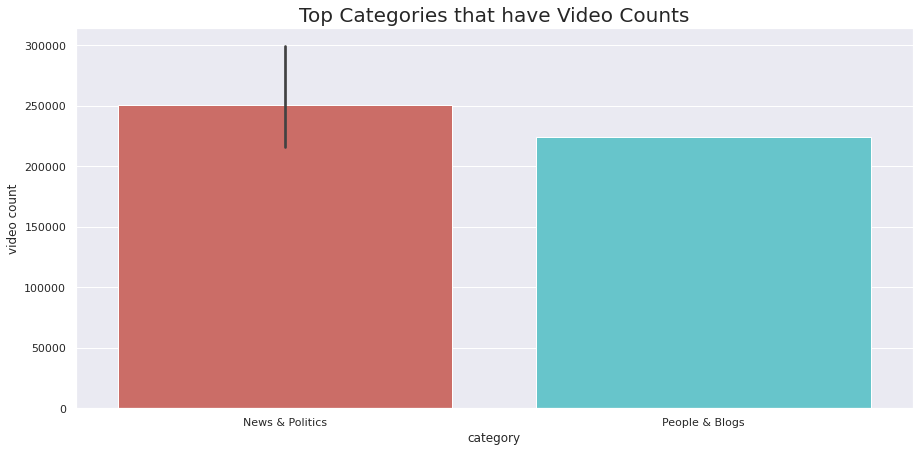

In [33]:
videocount=data.sort_values('video count',ascending=False)
plt.figure(figsize=(15,7))
videocount=videocount[:5]
sns.barplot(x="category",y="video count",data=videocount,palette="hls")
plt.title('Top Categories that have Video Counts',size=20);

In [34]:
def plot(data, xcol, ycol, size, color,title):
 px.scatter(data, x=xcol,y=ycol,size=size, color=color,log_x=True, size_max=50).set_title(title,fontsize=20)
 axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
title1 = 'categories with video views and subscribers'
title2 = 'categories with video views and video counts'

In [35]:
fig = px.scatter(data, x="subscribers", y="video views",size="video views", color="category",log_x=True, size_max=50,
                 title="Categories with Video views and Subscribers",marginal_y='rug')
fig.show()

In [36]:
fig = px.scatter(data, x="video count", y="video views",size="video views", color="category",log_x=True, size_max=50,
                 title="Categories with Video views and Video count",
                marginal_y='rug')
fig.show()

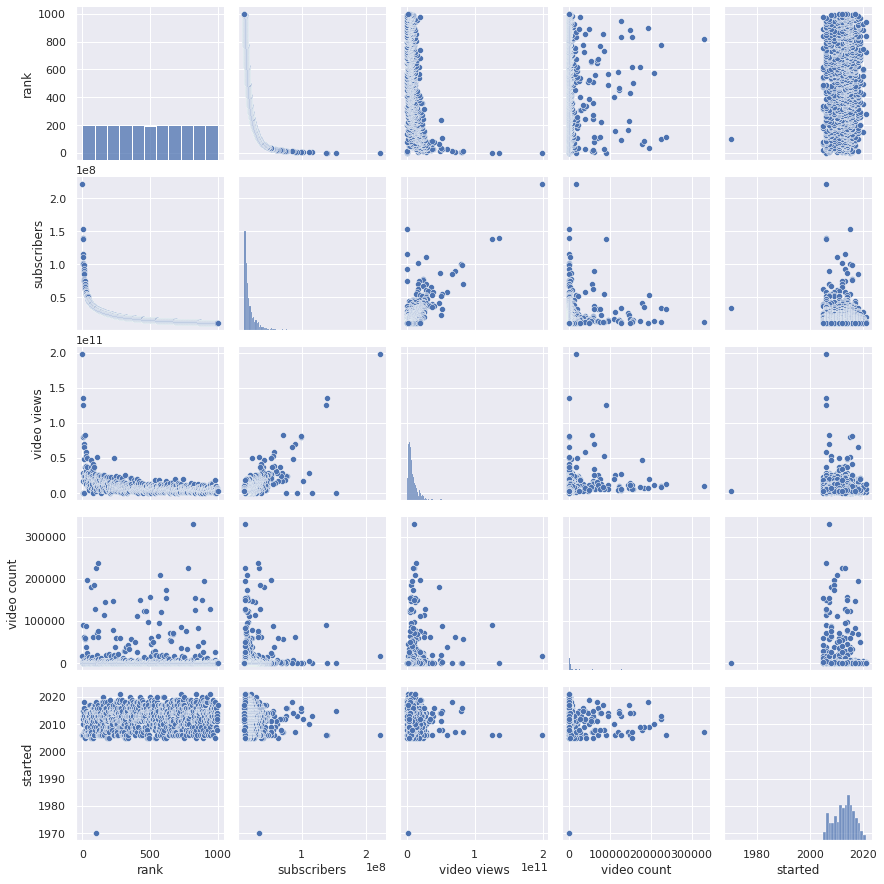

In [37]:
sns.pairplot(data=data)
plt.show()

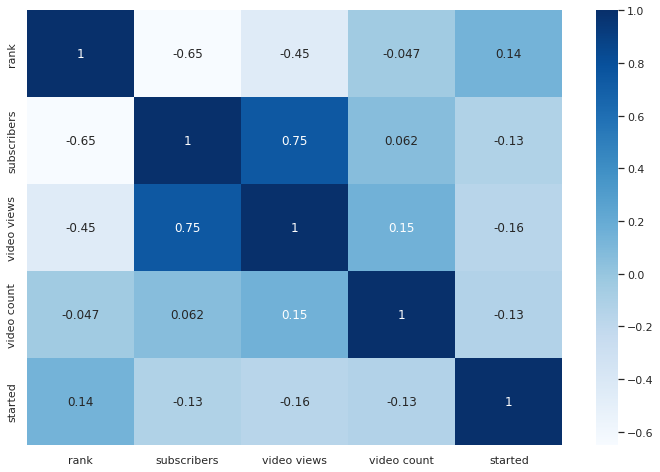

In [38]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='Blues',annot = True)
plt.show()